In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("ising_model.ipynb")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1-D and 2-D Ising Models

| Question  | Points |
|---|---|
| 1 | 2 |
| 2 | 2 |
| 3 | 4 |
| 4 | 2 |

## 1D Ising Model

Consider the 1D ising model where we have a *chain* consisting of spins that can take values $\sigma_i = \pm 1$, $i$ denoting the location of the spin in the chain. Consider the following Hamiltonian,

$$ H = -J\sum_{i,J} \sigma_i \sigma_j $$

Where $J$ is the coupling strength between the spins, and note that we ignore any external magnetic field.

### Question 1

The Hamiltonian defined as the sum of kinetic and potential energy,

$$ H = \text{KE} + \text{PE} $$

Let's construct a function which returns a 1-D chain by creating a random array of size `10` with values of `1` and `-1` for any length `N`. Note you should enforce boundary conditions, i.e the first and last spins are the same.

*Hint: Use `np.random.choice`, and use the possible values as `[-1, 1]`. Note `p` is the probability for having a -1 spin value.*

In [3]:
def ising_chain(N: int, p: float):
    chain = np.random.choice([-1,1], size=N-1, p=[p,1-p])
    chain = np.append(chain, chain[0])
    return chain


Here's a quick visualization of what the 1D Ising Model looks like.

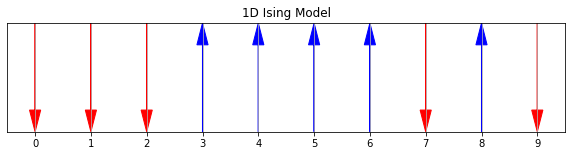

In [4]:
N = 10

x = np.arange(0, N)
model_chain = ising_chain(N, .25)

plt.figure(figsize=(10, 2))

for index, value in enumerate(model_chain):
    if value == 1:
        plt.arrow(index, 0, 0, 0.8, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
    else:
        plt.arrow(index, 1, 0, -0.8, head_width=0.2, head_length=0.2, fc='red', ec='red')

plt.title("1D Ising Model")
plt.ylim(0, 1)
plt.xlim(-0.5, len(x) - 0.5)
plt.xticks(x)
plt.yticks([])
plt.grid(axis='x')
plt.show()

In [5]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2

Now we want to write a function that finds the energy of the system. Using the Hamiltonian defined in Question 1, make a function that returns the energy for any 1D length Ising chain.

In [8]:
def energy_calc(model_chain: np.ndarray):
    J=1
    model_chain = np.array(model_chain)
    energy = -J * np.sum(model_chain[:-1] * model_chain[1:])
    return energy

In [9]:
grader.check("q2")

q2 results: All test cases passed!

### Question 3

To simulate the dynamics of spins flipping we will implement the **Metropolis Algorithm** (https://en.wikipedia.org/wiki/Ising_model#Metropolis_algorithm). In short, the algorithm is as follows:

1. Choose 1 random spin.
2. Flip the spin.
3. If the energy is less compared to the original configuration of the system, accept it.
4. If new energy is more, only keep with probability $e^{-(1/k_B T)(H_\nu-H_\mu)}$, where $\nu$ = new states and $\mu$ = present state. **For simplicity let's set $k_B = 1$ so that the probability is only temperature dependent**.

In [13]:
def time_step(model_chain: np.ndarray, T):

    # Copy the model chain using np.copy.
    new_model_chain = np.copy(model_chain)
    
    # Pick a random spin position in your array, what should you use from np.random?
    random_spin_pos = np.random.randint(len(model_chain))
    #new_model_chain[random_spin_pos] *= -1
    
    # Enforcing periodic boundary conditions implemented for you.
    chain_size = len(model_chain)
    if (random_spin_pos == chain_size - 1) or (random_spin_pos == 0):
        new_model_chain[-1] = -new_model_chain[-1]
        new_model_chain[0] = -new_model_chain[0]
    else:
        new_model_chain[random_spin_pos] = -new_model_chain[random_spin_pos]
    
   
    # Compute the energy difference between the new and old chain.
    E_old = energy_calc(model_chain)
    E_new = energy_calc(new_model_chain)
    energy_difference = E_new - E_old
    rand_probability = np.random.rand()

    if energy_difference <=0:
        return new_model_chain
    else:
        flip_probability = np.exp(-energy_difference / T)
        if flip_probability > rand_probability:
            return new_model_chain
        else:
            return model_chain

In [14]:
grader.check("q3")

q3 results:
    q3 - 1 result:
        ❌ Test case failed
        Trying:
            np.random.seed(112)
        Expecting nothing
        ok
        Trying:
            test_chain = ising_chain(10, 0.5)
        Expecting nothing
        ok
        Trying:
            bool(np.all(time_step(test_chain, 100) == np.array([1, 1, 1, -1, 1, 1, -1, 1, 1, 1])))
        Expecting:
            True
        **********************************************************************
        Line 3, in q3 0
        Failed example:
            bool(np.all(time_step(test_chain, 100) == np.array([1, 1, 1, -1, 1, 1, -1, 1, 1, 1])))
        Expected:
            True
        Got:
            False

    q3 - 2 result:
        ❌ Test case failed
        Trying:
            np.random.seed(57)
        Expecting nothing
        ok
        Trying:
            test_chain = ising_chain(10, 0.2)
        Expecting nothing
        ok
        Trying:
            bool(np.all(time_step(test_chain, 10) == np.array([-1, 1, -1, 1, 1, 1, 1, 1, 1, -1])))
        Expecting:
            True
        **********************************************************************
        Line 3, in q3 1
        Failed example:
            bool(np.all(time_step(test_chain, 10) == np.array([-1, 1, -1, 1, 1, 1, 1, 1, 1, -1])))
        Expected:
            True
        Got:
            False

<!-- BEGIN QUESTION -->

### Question 4

The magnetization for the 1D Ising Model is just the average of your spin chain. I.e,

$$ M = \langle \sigma \rangle $$

where $N$ is your spin chain. Below is an implementation of looking at the magnetization of the system, where initially all the spins are aligned in one direction (`ising_1D = ising_chain(N, 0)`) where the system evolves to some `T` defined in `time_steps`.

**Here's the question:**

The 1D case of the Ising Model theoretically cannot have any spontaneous magnetization (https://ps.uci.edu/~cyu/p115A/LectureNotes/Lecture18/html_version/lecture18.html). But we can see at $T<1$, it seems that the system is able to maintain some magnetization. Is this still consistent with theory? At what temperature do you see $N=10$ start to go to what we expect?

*Hint: Play with the variable `time_steps`, and think about time scales at low temperatures...*

No, our simulation of the Ising Model shows some magnetization at low temperatures (T<1) because in a small system (N=10), the fluctuations are large enough that the system might appear to "maintain" some magnetization. At temperatures higher than 1, we see that the magnetization goes towards 0, which is consistent with the theory.

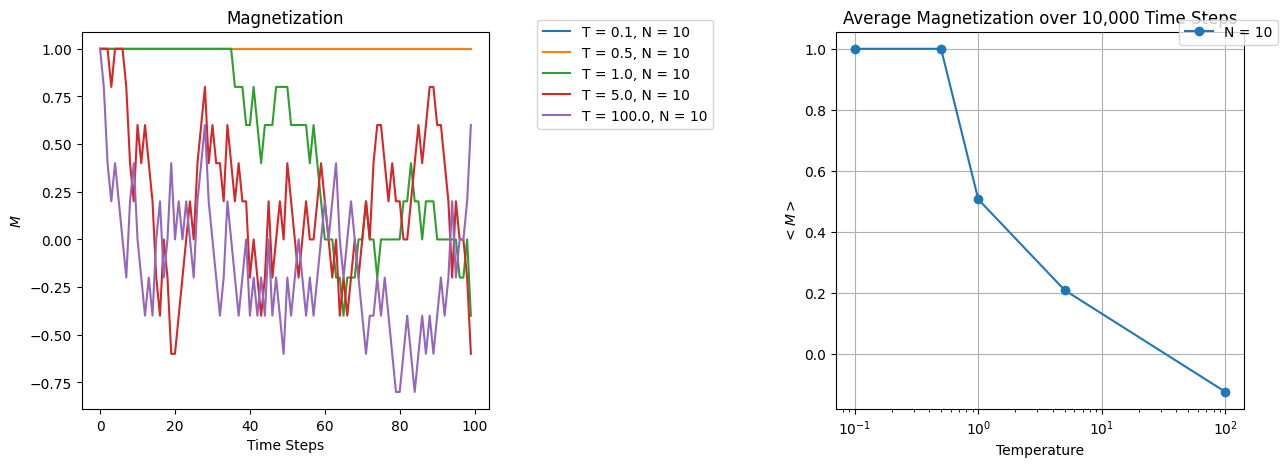

In [40]:
T_array = np.array([.1, .5, 1, 5, 100])
N_array = np.array([10]) # Can add more spins if you'd like here

f, (ax1, ax2) = plt.subplots(1, 2, dpi = 100, figsize = (15, 5))
f.subplots_adjust(wspace = .85)

ax1.set_title("Magnetization")
ax1.set_xlabel("Time Steps")
ax1.set_ylabel("$M$")

ax2.set_title("Average Magnetization over 10,000 Time Steps")
ax2.set_xlabel("Temperature")
ax2.set_ylabel("$<M>$")
ax2.grid()

time_steps = 100

for N in N_array:
    
    average_magnetization = np.array([])
    for T in T_array:
        np.random.seed(112)
        ising_1D = ising_chain(N, 0)
        magnetization = np.array([np.average(ising_1D)])
        for i in range(time_steps - 1):
            ising_1D = time_step(ising_1D, T)
            magnetization = np.append(magnetization, np.average(ising_1D))
    
        average_magnetization = np.append(average_magnetization, np.average(magnetization))

        if N == 10: # Change me to 10, 50, 100.
            ax1.plot(np.arange(0, time_steps), magnetization, label = f"T = {T}, N = {N}")

    ax2.semilogx(T_array, average_magnetization, marker = "o", label = f"N = {N}")

ax1.legend(bbox_to_anchor=(1.1, 1.05))
ax2.legend(bbox_to_anchor=(1.1, 1.05))

<!-- END QUESTION -->

# 2D Ising Model (Optional)

## Question 5
Make the 2D Ising Model

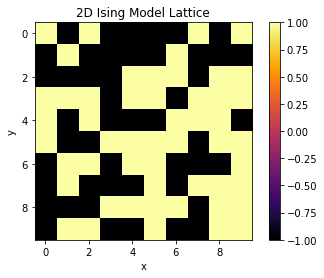

In [15]:
def ising_model_2D(N):
    '''
    For simplicity we can just make our ising model into a square
    N x N matrix.

    There's two ways to go about:
    1. Doing a double for loop to initialize your matrix.
    2. Using np.random.rand and create your 2D matrix.
    '''
    matrix = np.random.rand(N,N)
    matrix[matrix > .5] = 1
    matrix[matrix <= .5] = -1

    return matrix

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Ising Model Lattice")
plt.imshow(ising_model_2D(10), cmap = 'inferno')
plt.colorbar()

## Question 6

Implementing the Metropolis algorithm in 2D. Slightly more difficult as we have to check the neighbors of each site, and each site could have a maximum of 4 neighbors.

- Implement either convolution matrix to calculate energy difference or just look at nearest neighbors.

In [16]:
# @jit
def time_step_2D(model_chain, T):

    model_size = len(model_chain) - 1 # Note that we assume our model is a square matrix.

    x = np.random.randint(len(model_chain))
    y = np.random.randint(len(model_chain))
    
    new_model_chain = np.copy(model_chain)

    new_model_chain[x][y] = -new_model_chain[x][y]

    E_i = 0
    E_f = 0
    
    if x > 0:
        E_i += -model_chain[x][y] * model_chain[x-1][y]
        E_f += -new_model_chain[x][y] * model_chain[x-1][y]
    if x < (model_size - 1):
        E_i += -model_chain[x][y] * model_chain[x+1][y]
        E_f += -new_model_chain[x][y] * model_chain[x+1][y]
    if y > 0:
        E_i += -model_chain[x][y] * model_chain[x][y-1]
        E_f += -new_model_chain[x][y] * model_chain[x][y-1]
    if y < (model_size - 1):
        E_i += -model_chain[x][y] * model_chain[x][y+1]
        E_f += -new_model_chain[x][y] * model_chain[x][y+1]

    energy_difference = E_f - E_i
    # Algorithm
    if energy_difference <= 0:
        
        return new_model_chain
    else:
        
        flip_probability = np.exp(-energy_difference/T)
        if flip_probability > np.random.rand():
            
            return new_model_chain
        else:
            return model_chain
    

Play around with the temperature of the system. What are the characteristics of a spontaneous magnetization in the plot?

In [17]:
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame=(0, len(images) - 1)):
        plt.imshow(images[frame], cmap='coolwarm')
    return interact(_show, x = 0)

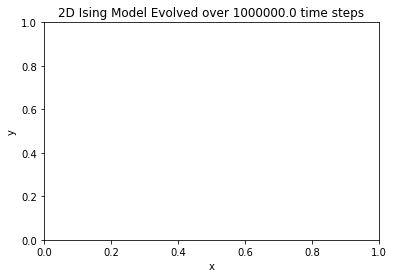

interactive(children=(IntSlider(value=1, description='frame', max=2), Output()), _dom_classes=('widget-interac…

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [18]:
images = [ising_model_2D(30)]
T = 1 # Temperature of the system
# Uncomment
for i in range(int(100)):
     if i % 50 == 0:
        images.append(time_step_2D(images[-1], T).copy())

plt.figure()
plt.title(f"2D Ising Model Evolved over {1e6} time steps")
plt.xlabel("x")
plt.ylabel("y")
display_ising_sequence(images)

plt.colorbar()
plt.show()

# Question 7

Find the critical temperature of the system that we stop seeing spontaneous magnetization.

In [21]:
# Uncomment

t_array = np.linspace(1e-3, 4, 30)
time_steps = int(1e6)

magnetization = np.array([])
for t in t_array:
    test_model = ising_model_2D(10)
    
    for j in range(time_steps):
        test_model = time_step_2D(test_model, t)
magnetization = np.append(magnetization, np.abs(np.average(test_model)))

plt.figure()
plt.title("Average Magnetization at T = 1e6")
plt.xlabel("t")
plt.ylabel("<M>")
plt.scatter(t_array, magnetization)
plt.grid()

KeyboardInterrupt: 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)